# Principal Component Analysis with Cancer Data

In [144]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [145]:
bc=pd.read_csv('C:/Users/Faisal/R5_Residency/Lab_Internal/breast-cancer-wisconsin-data.csv')
bc.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [146]:
print ('Datatype of each column of the dataset')
print ('-------------------------------------')
print (bc.dtypes)
print('\nShape of the dataset')
print ('-------------------------------------')
print (bc.shape)
print (bc.describe().transpose())

Datatype of each column of the dataset
-------------------------------------
ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

Shape of the dataset
-------------------------------------
(699, 11)
                             count          mean            std      min  \
ID                           699.0  1.071704e+06  617095.729819  61634.0   
ClumpThickness               699.0  4.417740e+00       2.815741      1.0   
Cell Size                    699.0  3.134478e+00       3.051459      1.0   
Cell Shape                   699.0  3.207439e+00       2.971913      1.0   
Marginal Adhesion            699.0  2.806

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [147]:
# We could see "?" values in column, this should be removed from data set
print('Count of ? in Bare Nuclei',bc['Bare Nuclei'].value_counts()['?']) 
bc.replace('?',0,inplace=True)
bc.drop_duplicates(subset='ID', keep='first', inplace=True)
print (bc.info ())
bc.head(25)
# Check for missing value in any other column
bc.isnull().sum()

Count of ? in Bare Nuclei 16
<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 697
Data columns (total 11 columns):
ID                             645 non-null int64
ClumpThickness                 645 non-null int64
Cell Size                      645 non-null int64
Cell Shape                     645 non-null int64
Marginal Adhesion              645 non-null int64
Single Epithelial Cell Size    645 non-null int64
Bare Nuclei                    645 non-null object
Normal Nucleoli                645 non-null int64
Bland Chromatin                645 non-null int64
Mitoses                        645 non-null int64
Class                          645 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.5+ KB
None


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [148]:
bc['Bare Nuclei']=bc['Bare Nuclei'].apply(pd.to_numeric)
bc.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [149]:
# No missing values found. So let us try to remove ? from bare nuclei column
print ('Answer is given in above lines')

# Get count of rows having ?
print ('Answer is given in above lines, it is 16')

Answer is given in above lines
Answer is given in above lines, it is 16


In [150]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
print ('Imputed with 0')

Imputed with 0


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


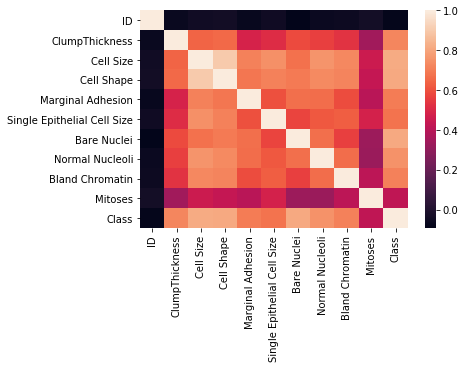

In [151]:
# Check for correlation of variable
import seaborn as sns
sns.heatmap(bc.corr())

In [136]:
print ('1. From the correlation heatmap, it is evident that Id is not correlated with target or any other variable, hence can be cropped form the dataset')
print ('2. Correlation is low between Target variable and Mitoses, still we will just keep it in our analysis. It coud be dropped too')
print ('3. Other variables have a good correlation with target variable-Class (Cell Size, Cell Shape, Bare Nuclei, Normal Nucleoli, Bland Chromatin, Clump Thickness, Marginal Adhesion and Single Epithelial Cell Size)')

1. From the correlation heatmap, it is evident that Id is not correlated with target or any other variable, hence can be cropped form the dataset
2. Correlation is low between Target variable and Mitoses, still we will just keep it in our analysis. It coud be dropped too
3. Other variables have a good correlation with target variable-Class (Cell Size, Cell Shape, Bare Nuclei, Normal Nucleoli, Bland Chromatin, Clump Thickness, Marginal Adhesion and Single Epithelial Cell Size)


In [152]:
# Dropping Id
bc.drop('ID',axis=1,inplace=True)
bc.head(2)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\Faisal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Faisal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


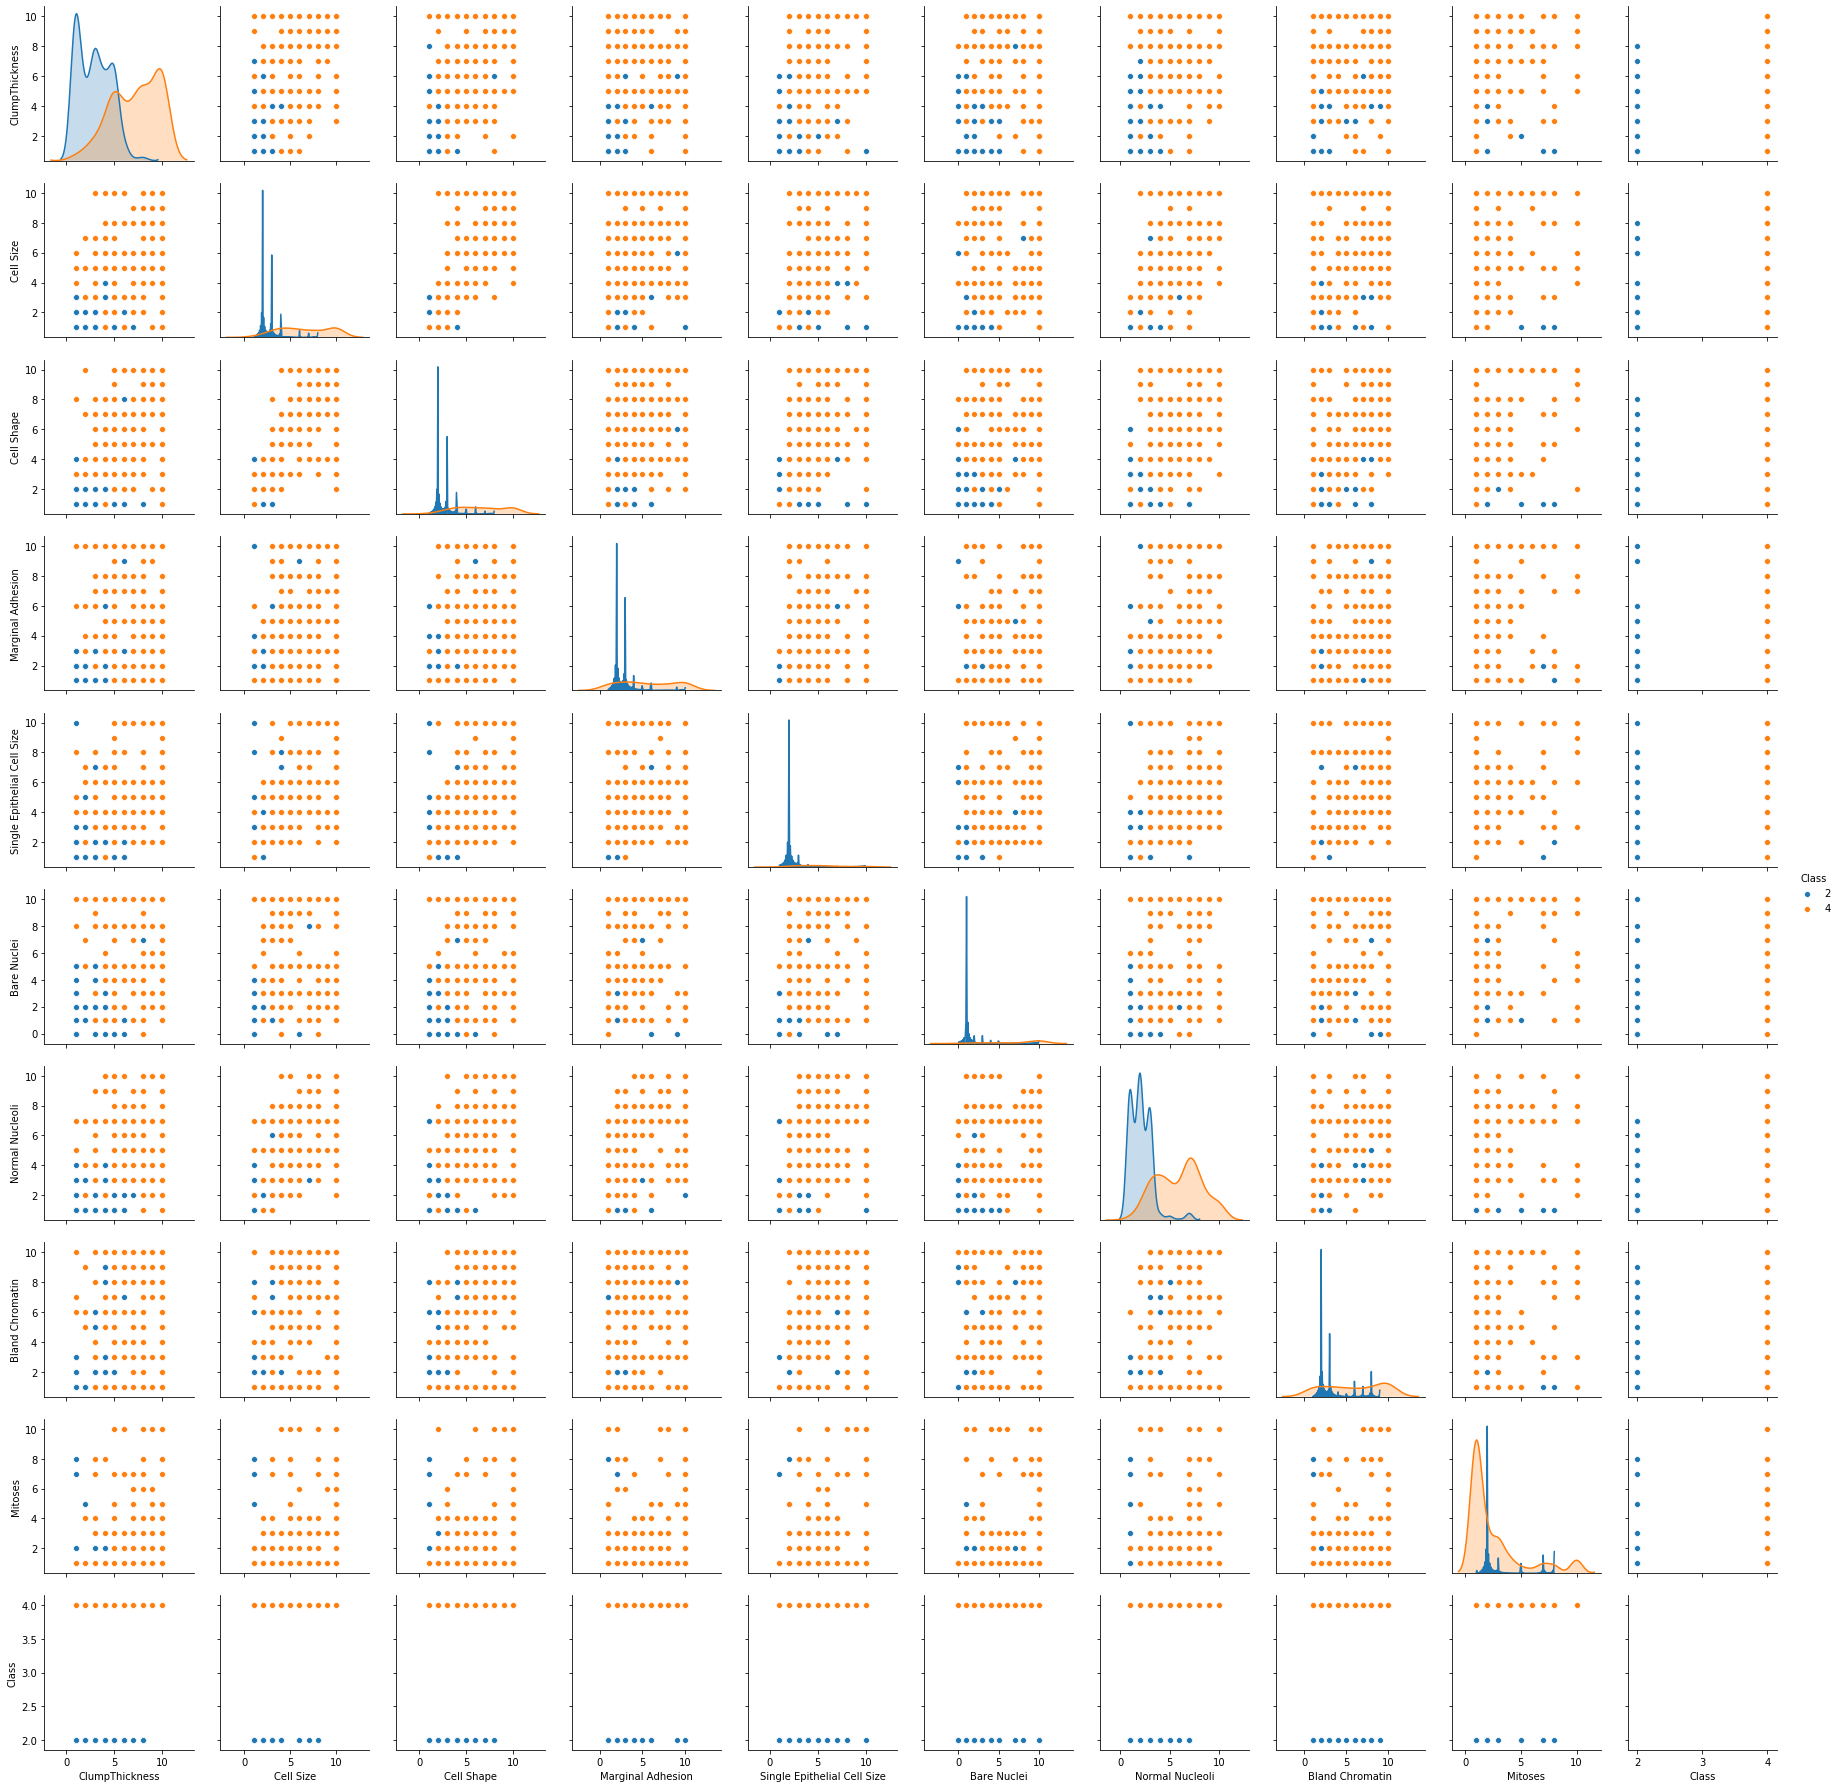

In [63]:
#Let us check for pair plots
sns.pairplot (bc,hue='Class')

In [138]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

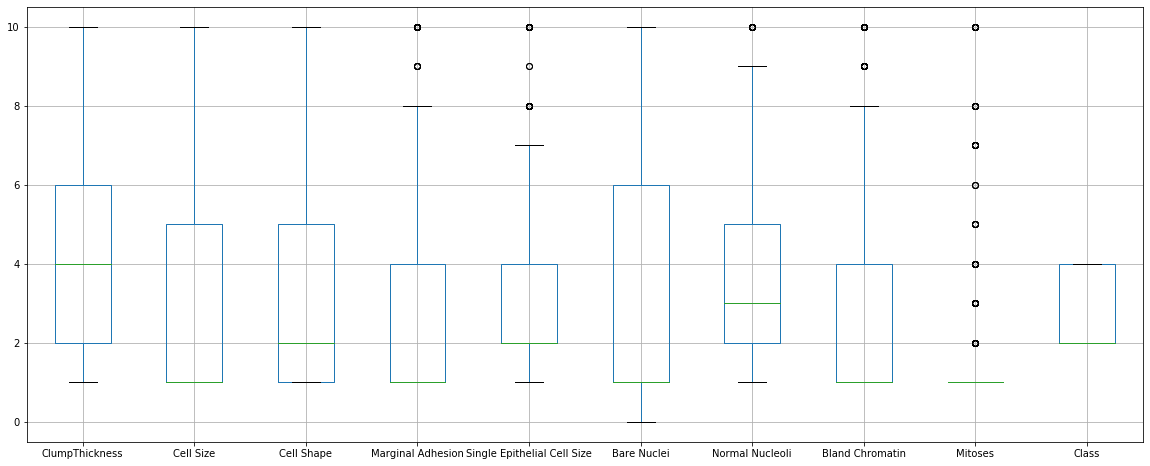

In [153]:
bc.boxplot(figsize=(20,8))

In [154]:
print ('It is evident that there are outliers available in fields Marginal Adhesion, Single Epithelial Cells, Normal Nucleoli, Bland Chromatin and Mitoses does have all the outliers. Hnce Mitoses variable can be dropped and remaining 4 variables need to be adjusted ')
print (pd.crosstab(bc['Marginal Adhesion'],bc['Class']))
print (pd.crosstab(bc['Single Epithelial Cell Size'],bc['Class']))
print (pd.crosstab(bc['Normal Nucleoli'],bc['Class']))
print (pd.crosstab(bc['Bland Chromatin'],bc['Class']))

It is evident that there are outliers available in fields Marginal Adhesion, Single Epithelial Cells, Normal Nucleoli, Bland Chromatin and Mitoses does have all the outliers. Hnce Mitoses variable can be dropped and remaining 4 variables need to be adjusted 
Class                2   4
Marginal Adhesion         
1                  337  31
2                   36  18
3                   27  26
4                    5  27
5                    2  17
6                    4  18
7                    0  13
8                    0  25
9                    1   4
10                   1  53
Class                          2   4
Single Epithelial Cell Size         
1                             39   1
2                            329  23
3                             27  40
4                              6  38
5                              4  34
6                              2  38
7                              3   9
8                              2  18
9                              0   2
10        

In [155]:
# We could see most of the outliers are now removed.
print ('We could observe from above analysis that for values of variables equal or above 4, always the target variable is given as Class 4. So we will adjust the outliers in the given four columns by chaging the values to 4 if value is above 4 and dopping the variable Mitoses')

We could observe from above analysis that for values of variables equal or above 4, always the target variable is given as Class 4. So we will adjust the outliers in the given four columns by chaging the values to 4 if value is above 4 and dopping the variable Mitoses


In [156]:
bc.drop('Mitoses',axis=1, inplace=True)
bc['Marginal Adhesion']=np.where (bc['Marginal Adhesion']>4, 4, bc['Marginal Adhesion'])
bc['Single Epithelial Cell Size']=np.where (bc['Single Epithelial Cell Size']>4, 4, bc['Single Epithelial Cell Size'])
bc['Normal Nucleoli']=np.where (bc['Normal Nucleoli']>4, 4, bc['Normal Nucleoli'])
bc['Bland Chromatin']=np.where (bc['Bland Chromatin']>4, 4, bc['Bland Chromatin'])
bc['Bland Chromatin'].max()

4

# Q6 Create a covariance matrix for identifying Principal components

In [157]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=bc.drop('Class',axis=1)
y=bc['Class']

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train_std = sc.fit_transform(x_train)  # scale training and test data independently to prevent data leaks
x_test_std = sc.fit_transform(x_test)

In [161]:
cov_matrix = np.cov(x_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00222222 0.61860927 0.62968549 0.52763448 0.54844427 0.57762869
  0.53424053 0.53991173]
 [0.61860927 1.00222222 0.90997068 0.71044856 0.7531582  0.66487078
  0.65257108 0.69185766]
 [0.62968549 0.90997068 1.00222222 0.70066502 0.73619972 0.68642661
  0.6507537  0.69031482]
 [0.52763448 0.71044856 0.70066502 1.00222222 0.67591808 0.69565824
  0.59556882 0.63109947]
 [0.54844427 0.7531582  0.73619972 0.67591808 1.00222222 0.65344592
  0.6202249  0.67910509]
 [0.57762869 0.66487078 0.68642661 0.69565824 0.65344592 1.00222222
  0.64050259 0.62023541]
 [0.53424053 0.65257108 0.6507537  0.59556882 0.6202249  0.64050259
  1.00222222 0.64399974]
 [0.53991173 0.69185766 0.69031482 0.63109947 0.67910509 0.62023541
  0.64399974 1.00222222]]


# Q7 Identify eigen values and eigen vector

In [162]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.31168939 -0.00940758  0.91604459  0.02828369 -0.01212108 -0.16739157
   0.1858406   0.01095363]
 [ 0.38243123 -0.71311867 -0.03198689 -0.41258565  0.16570316  0.31463591
  -0.15373033 -0.15450479]
 [ 0.38248859  0.69522579  0.00586214 -0.38452557  0.13498279  0.32153347
  -0.26824528 -0.17002838]
 [ 0.35115002  0.03554288 -0.25231089 -0.0816248  -0.55811363 -0.13755529
   0.53430448 -0.43498668]
 [ 0.3600072   0.04904161 -0.2170805  -0.22520005  0.09776736 -0.14272578
   0.3340777   0.79285164]
 [ 0.35038778 -0.06461935 -0.02168286  0.31847304 -0.58820877 -0.01701102
  -0.6010769   0.25216095]
 [ 0.33686765  0.01255659 -0.09492363  0.70385025  0.30070871  0.47794762
   0.24863393 -0.03561402]
 [ 0.34804544 -0.00571513 -0.19884519  0.1640283   0.44352071 -0.70822674
  -0.22287502 -0.25380702]]

 Eigen Values 
%s [5.59147688 0.09034112 0.52312315 0.45802481 0.42564671 0.34879259
 0.28348542 0.2968871 ]


# Q8 Find variance and cumulative variance by each eigen vector

In [163]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 69.73848655  76.26302698  81.97564242  87.28442896  91.63466913
  95.33752933  98.87323997 100.        ]


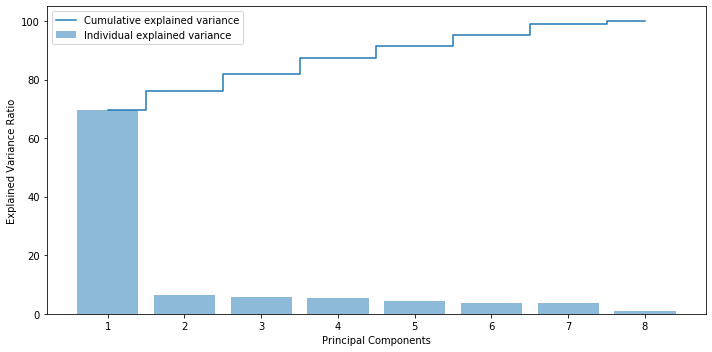

In [164]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [165]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [166]:
explained_variance = pca.explained_variance_ratio_

In [199]:
li = list(bc).remove('Class')
print(li)

None


# Q10 Find correlation between components and features

In [200]:
bc_comp=pd.DataFrame(pca.components_,columns=list(x))
bc_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
0,0.380212,0.471893,0.460011,0.179562,0.134288,0.564536,0.146354,0.175356
1,0.260594,0.405024,0.345225,-0.027133,0.031854,-0.803492,-0.009788,0.037698
2,0.885757,-0.340734,-0.296719,-0.072447,-0.056391,-0.013822,-0.017683,-0.048581
3,0.040758,0.012102,0.367437,-0.347152,-0.217183,0.151975,-0.409873,-0.710216
4,0.027900,0.672665,-0.660200,0.088790,0.010611,0.050055,-0.134084,-0.287051


In [0]:
sns.heatmap (df_comp.corr())

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [167]:
jk=pd.read_csv('C:/Users/Faisal/R5_Residency/Lab_Internal/jokes.csv')
jk.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [212]:
ratings=jk.iloc[0:200,1:]
ratings.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [213]:
#ratings.drop('NumJokes',axis=1,inplace=True)
ratings.replace(99.00,0,inplace=True)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [236]:
ratings_df=ratings.mean()
ratings_df=pd.DataFrame(ratings_mean)
ratings_df.head()

,0
Joke1,0.53005
Joke2,0.59390
Joke3,0.23765
Joke4,-0.70100
Joke5,-0.03790


In [245]:
ratings_df.max()

0    4.0554
dtype: float64

In [246]:
ratings_df[0]

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
Joke6      1.32005
Joke7      0.17150
Joke8     -0.08530
Joke9      0.01670
Joke10     0.89470
Joke11     1.16675
Joke12     1.34195
Joke13    -1.34810
Joke14     1.96950
Joke15    -1.57630
Joke16    -2.85160
Joke17    -0.82600
Joke18    -0.74145
Joke19     0.30400
Joke20    -0.82725
Joke21     2.56045
Joke22     0.93365
Joke23     0.34435
Joke24    -1.09905
Joke25     0.56475
Joke26     1.15680
Joke27     3.05240
Joke28     1.15585
Joke29     3.18995
Joke30    -0.70215
            ...   
Joke71    -0.15430
Joke72     1.12100
Joke73     0.36100
Joke74    -0.40885
Joke75    -0.14515
Joke76     0.67045
Joke77     0.21805
Joke78     0.72365
Joke79     0.27445
Joke80     0.57735
Joke81     0.49335
Joke82     0.30125
Joke83     0.88235
Joke84     0.40525
Joke85     0.42435
Joke86     0.24565
Joke87     0.60490
Joke88     0.83650
Joke89     1.44285
Joke90    -0.34395
Joke91     0.56260
Joke92     0

In [248]:
ratings_df[0].sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
Name: 0, dtype: float64